In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the CSV files into pandas DataFrames
file1 = 'Unemployment_Rate_upto_11_2020.csv'
file2 = 'Unemployment in India.csv'

In [3]:
data1 = pd.read_csv(file1)
data2 = pd.read_csv(file2)

In [4]:
# Display the first few rows of each DataFrame to understand their structure
print("Data from Unemployment_Rate_upto_11_2020.csv:")
print(data1.head())
print("\nData from Unemployment in India.csv:")
print(data2.head())


Data from Unemployment_Rate_upto_11_2020.csv:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  la

In [5]:
# Print the column names of each DataFrame
print("\nColumn names in data1:")
print(data1.columns)
print("\nColumn names in data2:")
print(data2.columns)


Column names in data1:
Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

Column names in data2:
Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [6]:
# Data Cleaning and Preprocessing
# Check for missing values
print("\nMissing values in data1:")
print(data1.isnull().sum())
print("\nMissing values in data2:")
print(data2.isnull().sum())



Missing values in data1:
Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

Missing values in data2:
Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [7]:
# Strip leading/trailing spaces from column names
data1.columns = data1.columns.str.strip()
data2.columns = data2.columns.str.strip()


In [8]:
# Strip leading/trailing spaces from date values
data1['Date'] = data1['Date'].str.strip()
data2['Date'] = data2['Date'].str.strip()

In [9]:
# Convert date columns to datetime format
data1['Date'] = pd.to_datetime(data1['Date'], format='%d-%m-%Y')
data2['Date'] = pd.to_datetime(data2['Date'], format='%d-%m-%Y')


In [10]:
# Ensure consistency in column names and data types
data1.columns = data1.columns.str.strip().str.replace(' ', '_')
data2.columns = data2.columns.str.strip().str.replace(' ', '_')


In [11]:
# Data Analysis
# Descriptive statistics of the unemployment rates
print("\nDescriptive statistics for data1:")
print(data1['Estimated_Unemployment_Rate_(%)'].describe())
print("\nDescriptive statistics for data2:")
print(data2['Estimated_Unemployment_Rate_(%)'].describe())


Descriptive statistics for data1:
count    267.000000
mean      12.236929
std       10.803283
min        0.500000
25%        4.845000
50%        9.650000
75%       16.755000
max       75.850000
Name: Estimated_Unemployment_Rate_(%), dtype: float64

Descriptive statistics for data2:
count    740.000000
mean      11.787946
std       10.721298
min        0.000000
25%        4.657500
50%        8.350000
75%       15.887500
max       76.740000
Name: Estimated_Unemployment_Rate_(%), dtype: float64


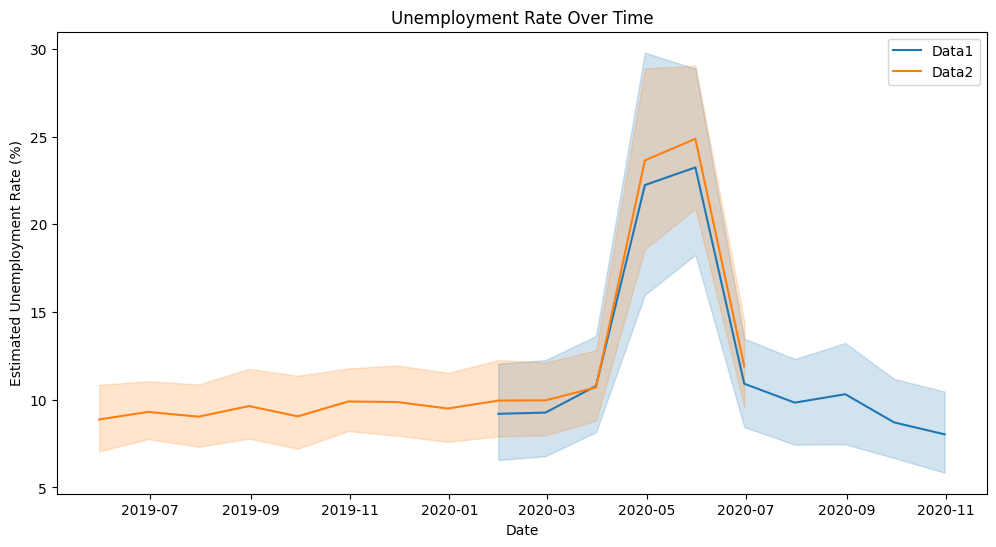

In [13]:
# Trend analysis over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data1, x='Date', y='Estimated_Unemployment_Rate_(%)', label='Data1')
sns.lineplot(data=data2, x='Date', y='Estimated_Unemployment_Rate_(%)', label='Data2')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend()
plt.show()

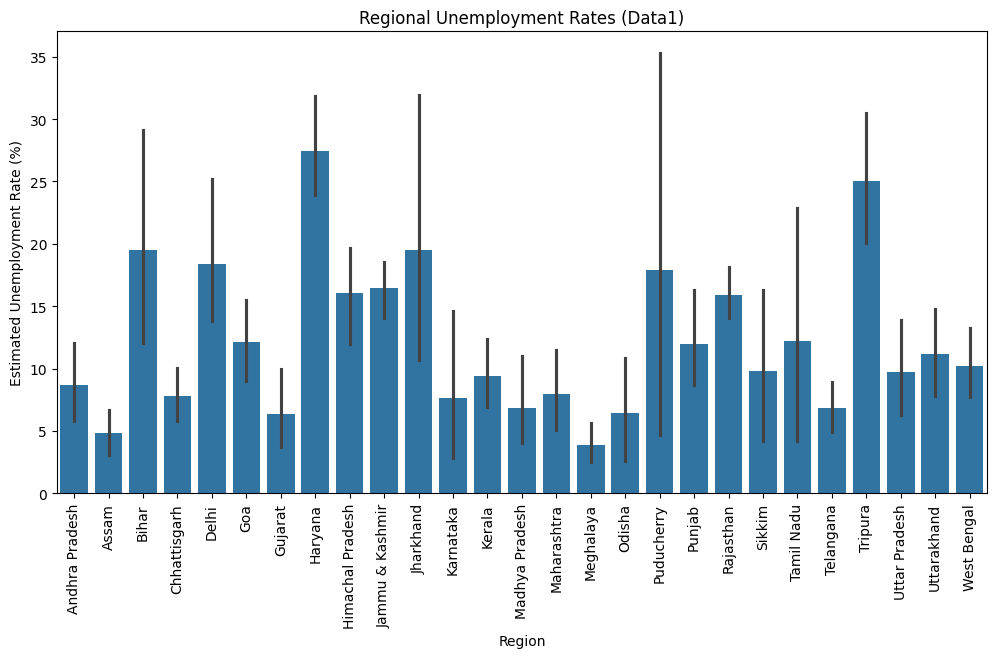

In [14]:
# Regional analysis of unemployment rates
plt.figure(figsize=(12, 6))
sns.barplot(data=data1, x='Region', y='Estimated_Unemployment_Rate_(%)')
plt.title('Regional Unemployment Rates (Data1)')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.show()

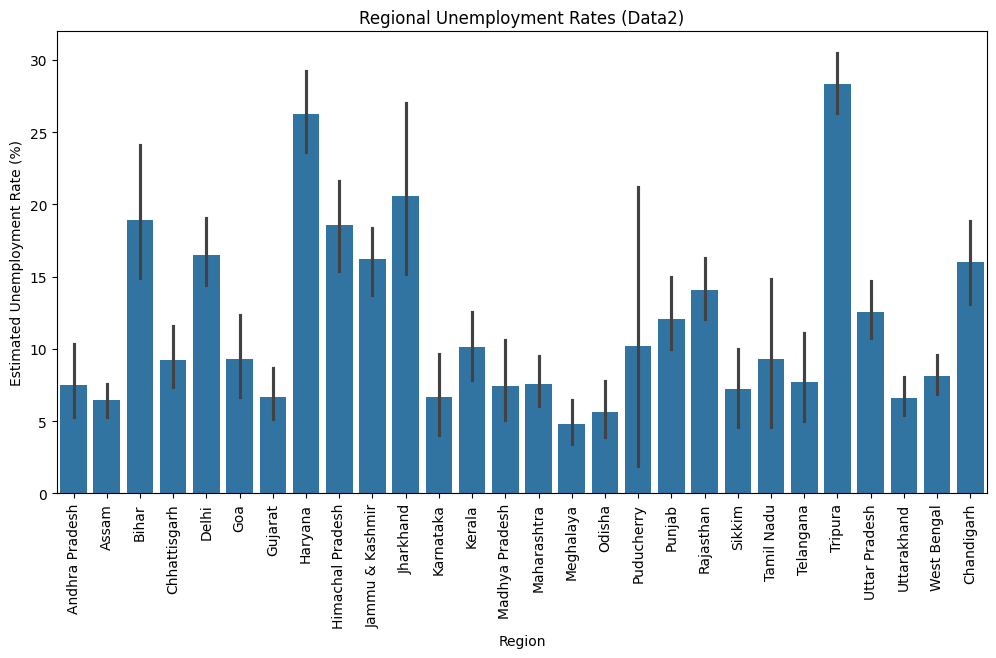

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data2, x='Region', y='Estimated_Unemployment_Rate_(%)')
plt.title('Regional Unemployment Rates (Data2)')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.show()

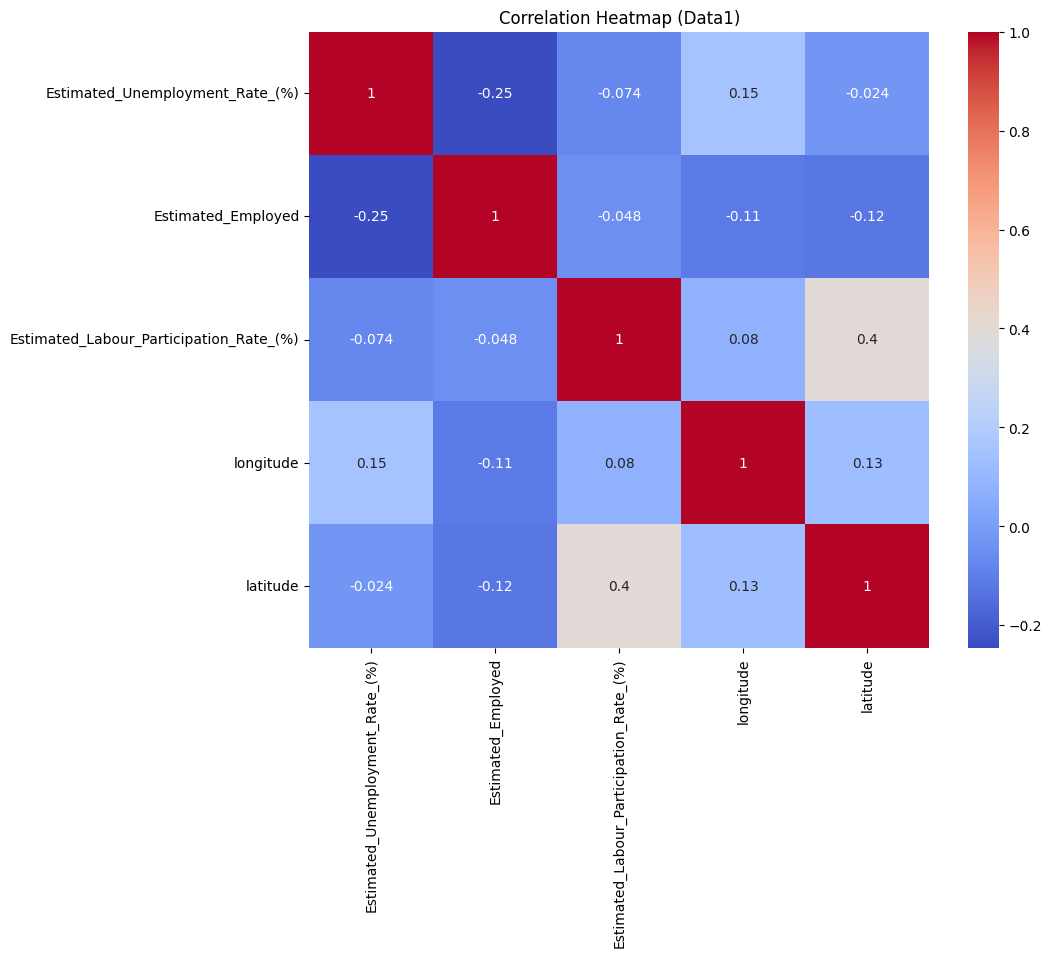

In [16]:
# Heatmap for correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(data1.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Data1)')
plt.show()

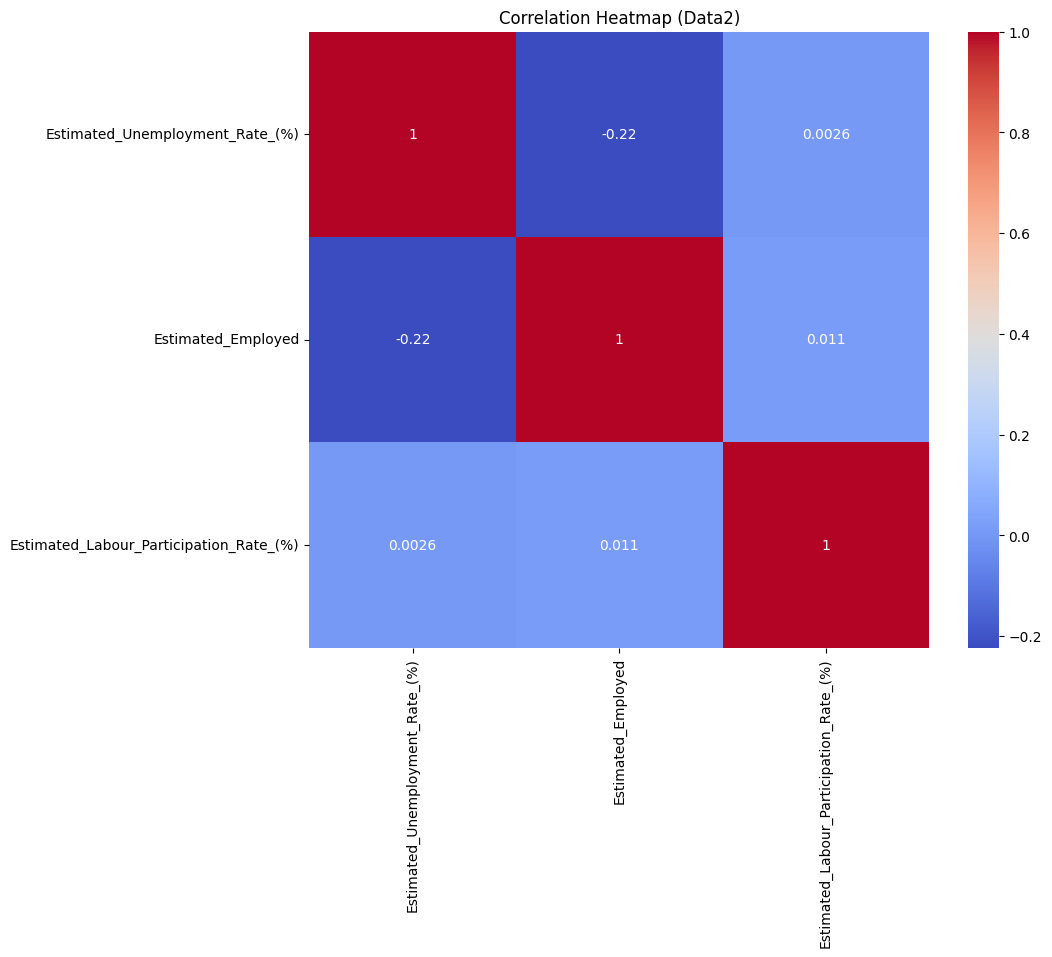

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(data2.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Data2)')
plt.show()
